In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
visible_layer_size = 5
hidden_layer_size = 2
burn_in_steps = 100,
walker_steps = 1000,
hamming_distance = 1,
seed = 44  # Seed for random number generator


In [4]:
H = utils.random_hamiltonian(2**visible_layer_size)

In [5]:
walker = mcmc.Walker() 
rbm = RBM(hamiltonian=H)  # Initializing RBM currently with random configuration and parameters

In [6]:
history = walker(rbm.probability, num_steps=walker_steps)

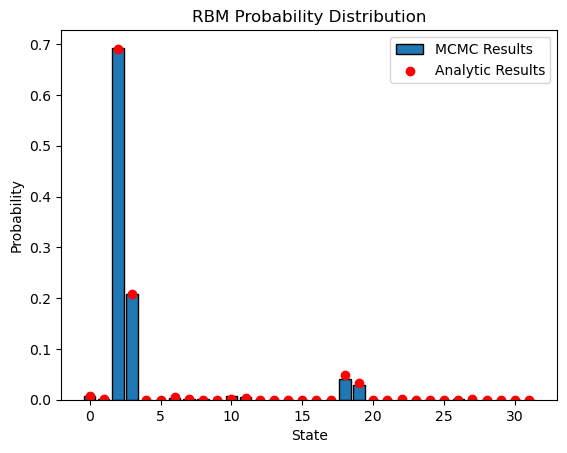

In [7]:
plt.hist([utils.binary_array_to_int(state) for state in history], density=True, bins=range(2**visible_layer_size+1), edgecolor="black", align='left', rwidth = 0.8, label='MCMC')
plt.scatter([x for x in range(2**visible_layer_size)], rbm.probability_dist(), color='red', label='Exact')
plt.title("RBM Probability Distribution")
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend(['MCMC Results', 'Analytic Results'])

plt.show()